# Project final:

Team:
- Kiều Hải Đăng - 19127347
- Lã Minh Hiếu - 19127400

## 1. Collecting data:

**1.1 The subject of data:**

- The dataset about TED Talks on the TED.com

**1.2 The origin of data:**
- We get dataset form [kaggle.](https://www.kaggle.com/rounakbanik/ted-talks?select=ted_main.csv)

**1.3 The licence of data:**
- The licence is [CC BY-NC-SA 4.0.](https://creativecommons.org/licenses/by-nc-sa/4.0/)

**1.4 How did authors collect data?**
- The data has been scraped from the official TED Website.

**1.5 Data describtion**
- These datasets contain information of all audio-video recordings of TED Talks uploaded to the official TED.com website until September 21st, 2017. 


## Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import json
import ast
import datetime as dt

## 2. Exploring data

- How many rows and how many columns?
- What is the meaning of each row?

    - Are there **duplicated** rows?
    - What is the meaning of each column?
    - What is the current data type of each column? Are there columns having inappropriate data types?
    
    - With each **numerical** column, how are values distributed?
        - What is the percentage of missing values?
        - Min? max? Are they abnormal?
        
    - With each **categorical** column, how are values distributed?
        - What is the percentage of missing values?
        - How many different values? Show a few
        - Are they abnormal?

### Read data from csv to dataframe 

In [2]:
ted_df = pd.read_csv('ted_main.csv')
ted_df.groupby('speaker_occupation').sum()

,comments,duration,film_date,languages,num_speaker,published_date,views
speaker_occupation,,,,,,,
Chairman of the Cordoba Initiative,152,1007,1255478400,47,1,1225429020,433202
"Child protection leader, activist, author",18,791,1464048000,5,1,1504036846,656113
Robotics engineer,10,651,1492992000,1,1,1506006095,375647
Space physicist,49,639,1446768000,27,1,1471360101,1465749
3D printer,87,544,1394668800,27,1,1411053523,2526255
...,...,...,...,...,...,...,...
e-Patient,199,991,1301875200,26,1,1309363260,534289
"inventor, engineer",88,906,1140739200,27,1,1155600660,1415724
medical inventor,108,301,1413244800,35,1,1416500289,1682547


### How many rows and columns does the data have?

In [3]:
n_rows, n_cols = ted_df.shape
n_rows, n_cols

(2550, 17)

### What is the meaning of each row?

Each row represents for a video/audio on ted.com

### Are there duplicated rows

In [4]:
ted_df.duplicated().any()

False

### What is the meaning of each column?

There are the description of each column in [kaggle.](https://www.kaggle.com/rounakbanik/ted-talks?select=ted_main.csv)

- **comments**: The number of first level comments made on the talk
- **description**: A blurb of what the talk is about
- **duration**: The duration of the talk in seconds
- **event**: The TED/TEDx event where the talk took place
- **film_date**: The Unix timestamp of filming
- **languages**: The number of languages in which the talk is available
- **main_speaker**: The first named speaker of the talk
- **name**: The official name of the TED Talk. Includes the title and speaker
- **num_speaker**: The number of speakers in the talk
- **published_date**: The Unix timestamp for the publication of the talk on TED.com
- **ratings**: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
- **related_talk**: A list of dictionaries of recommended talks to watch next
- **speaker_occupation**: The occupation of the main speaker
- **tags**: The themes associated with the talk
- **title**: The title of the talk
- **url**: The URL of the talk
- **views**: The number of views on the talk

### What is the current data type of each column? Are there columns having inappropriate data types?

In [5]:
col_dtypes = ted_df.dtypes
col_dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

`ted_df` has 10 columns which have `object` data types:
- "description","event","main_speaker","name","ratings","related_talks","speaker_occupation","tags","title","url".
- However, 
    - "ratings" now is a string `{'id': 7, 'name': 'Funny', 'count': 19645}`, need to convert to list of dictionary
    - "tags" now is a string, but actually it's a list.
- "film_date" and "published_date" is `int64` data type.

### With each numerical column
- What is the percentage of missing values?
- Min? max? Are they abnormal?

### Transform the data type of "film_date" and "published_date" to dataframe

In [6]:
ted_df['film_date'] = pd.to_datetime(ted_df['film_date'],unit='s')
ted_df['published_date'] = pd.to_datetime(ted_df['published_date'],unit='s')

**Convert to list function**

In [7]:
def convert_to_list(x):
    return ast.literal_eval(x)

### Transform the data type of "ratings" to list of dict

In [8]:
ted_df['ratings'] = ted_df['ratings'].apply(lambda x : convert_to_list(x))

In [9]:
def get_total_ratings(x):
    total = 0
    for i in x:
        total = total + i['count']
    return total
ted_df['total_ratings'] = ted_df['ratings'].apply(lambda x : get_total_ratings(x))

In [10]:
def missing_ratio(s):
    return s.isna().mean()*100
num_cols = ted_df[['comments','film_date','duration','languages','num_speaker','published_date','views','total_ratings']]
num_col_profiles_df = num_cols.agg([missing_ratio,pd.Series.min,pd.Series.max])
num_col_profiles_df

,comments,film_date,duration,languages,num_speaker,published_date,views,total_ratings
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2.0,1972-05-14 00:00:00,135.0,0.0,1.0,2006-06-27 00:11:00,50443.0,68.0
max,6404.0,2017-08-27 00:00:00,5256.0,72.0,5.0,2017-09-22 15:00:22,47227110.0,93850.0


min, max are not abnormal.

### With each categorical column
- What is the percentage of missing values?
- How many different values? Show a few
- Are they abnormal?

In [11]:
def unique_not_nan(s):
    return s.dropna().unique()
cate_cols = ted_df[["description","event",
                    "main_speaker","name","related_talks",
                    "speaker_occupation",
                    "tags","title","url"]]
cate_col_profiles_df = cate_cols.agg([missing_ratio,pd.Series.nunique,unique_not_nan])
cate_col_profiles_df.index = ["missing_ratio", "num_diff_vals", "diff_vals"]
cate_col_profiles_df

,description,event,main_speaker,name,related_talks,speaker_occupation,tags,title,url
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.235294,0.0,0.0,0.0
num_diff_vals,2550,355,2156,2550,2550,1458,2530,2550,2550
diff_vals,[Sir Ken Robinson makes an entertaining and pr...,"[TED2006, TED2004, TED2005, TEDGlobal 2005, TE...","[Ken Robinson, Al Gore, David Pogue, Majora Ca...","[Ken Robinson: Do schools kill creativity?, Al...","[[{'id': 865, 'hero': 'https://pe.tedcdn.com/i...","[Author/educator, Climate advocate, Technology...","[['children', 'creativity', 'culture', 'dance'...","[Do schools kill creativity?, Averting the cli...",[https://www.ted.com/talks/ken_robinson_says_s...


In [12]:
ted_df.sample(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,total_ratings
1754,122,"As a young girl, photojournalist and TED Fello...",300,TED2014,2014-03-17,35,Kitra Cahana,Kitra Cahana: A glimpse of life on the road,1,2014-05-28 15:11:03,"[{'id': 25, 'name': 'OK', 'count': 179}, {'id'...","[{'id': 669, 'hero': 'https://pe.tedcdn.com/im...",Vagabond photojournalist + conceptual artist,"['TED Fellows', 'art', 'global issues', 'journ...",A glimpse of life on the road,https://www.ted.com/talks/kitra_cahana_stories...,1454663,1372
482,26,The legendary design team Charles and Ray Eame...,908,TED2007,2007-02-02,20,Eames Demetrios,Eames Demetrios: The design genius of Charles ...,1,2009-07-06 01:00:00,"[{'id': 2, 'name': 'Confusing', 'count': 94}, ...","[{'id': 520, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['children', 'creativity', 'design', 'film', '...",The design genius of Charles + Ray Eames,https://www.ted.com/talks/the_design_genius_of...,594111,540


## 3. Asking meaningful questions

- What is the question?
- What are benefits of finding the answer?
- What is the most popular subject in each year?

1. How is the distribution of the number of events over the years? Anything unusual? make a comment.
2. Which profession will have the most views when giving a presentation? Does that view depend on the character's reputation, money, or status?
3. Ratings.
4. The distribution of video genres by year? From there draw comments.

## 4. Preprocessing + analyzing data to answer each question

### Add published year column

In [13]:
ted_df['Year_published'] = ted_df['published_date'].dt.year

#### 1. How is the distribution of the number of events over the years? Anything unusual? make a comment.

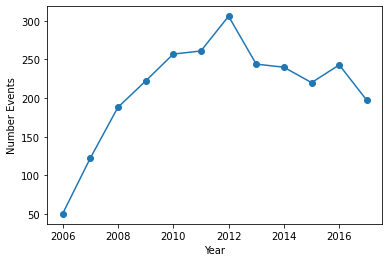

In [15]:
Q1 = ted_df.groupby('Year_published')['event'].count()
Q1.plot.line(ylabel = 'Number Events', xlabel = 'Year', marker='o');

#### 2. Which profession will have the most views when giving a presentation? Does that view depend on the character's reputation, money, or status?

#### 3. Ratings

In [16]:
def get_rating_negative(x):
    total = 0
    for i in x:
        if i['name'] in ["Unconvincing","Obnoxious","Confusing", "Longwinded"]:
            total = total + i['count']
    return total
ted_df['negative_ratings'] =ted_df['ratings'].apply(lambda x : get_rating_negative(x))

In [17]:
ted_df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,total_ratings,Year_published,negative_ratings
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"[children, creativity, culture, dance, educati...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,93850,2006,1138
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"[alternative energy, cars, climate change, cul...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2936,2006,564
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"[computers, entertainment, interface design, m...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2824,2006,351
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"[MacArthur grant, activism, business, cities, ...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,3728,2006,156
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"[Africa, Asia, Google, demo, economics, global...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,25620,2006,310


<AxesSubplot:xlabel='Year_published'>

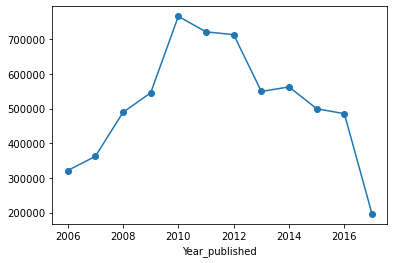

In [18]:
dt = ted_df.groupby('Year_published')['total_ratings'].sum()
dt.plot.line(marker='o')
#Unconvincing, obnoxious, confusing, longwinded

#### 4. Tags

### Transform the data type of "tags" to list

In [14]:
ted_df['tags'] = ted_df['tags'].apply(lambda x: convert_to_list(x))

In [19]:
df_tags = ted_df.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1,drop=True)
df_tags.name = 'tag'
df_tags  = ted_df.drop('tags', axis=1).join(df_tags)
df_tags

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,title,url,views,total_ratings,Year_published,negative_ratings,tag
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,93850,2006,1138,children
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,93850,2006,1138,creativity
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,93850,2006,1138,culture
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,93850,2006,1138,dance
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,93850,2006,1138,education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,8,With more than half of the world population li...,519,TED2017,2017-04-24,1,Karoliina Korppoo,Karoliina Korppoo: How a video game might help...,1,2017-09-22 15:00:22,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...",Game designer,How a video game might help us build better ci...,https://www.ted.com/talks/karoliina_korppoo_ho...,391721,142,2017,37,play
2549,8,With more than half of the world population li...,519,TED2017,2017-04-24,1,Karoliina Korppoo,Karoliina Korppoo: How a video game might help...,1,2017-09-22 15:00:22,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...",Game designer,How a video game might help us build better ci...,https://www.ted.com/talks/karoliina_korppoo_ho...,391721,142,2017,37,public spaces
2549,8,With more than half of the world population li...,519,TED2017,2017-04-24,1,Karoliina Korppoo,Karoliina Korppoo: How a video game might help...,1,2017-09-22 15:00:22,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...",Game designer,How a video game might help us build better ci...,https://www.ted.com/talks/karoliina_korppoo_ho...,391721,142,2017,37,society
2549,8,With more than half of the world population li...,519,TED2017,2017-04-24,1,Karoliina Korppoo,Karoliina Korppoo: How a video game might help...,1,2017-09-22 15:00:22,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...",Game designer,How a video game might help us build better ci...,https://www.ted.com/talks/karoliina_korppoo_ho...,391721,142,2017,37,software


## 5. Conclusion

## 6. Reflection

- Each member: What difficulties have you encountered?
- Each member: What have you learned?
- Your group: If you had more time, what would you do?

## 7. Reference
1. [Data set](https://www.kaggle.com/rounakbanik/ted-talks).
2. https://gocnhintangphat.com/timestamp-la-gi/.
3. https://rstudio-pubs-static.s3.amazonaws.com/321337_38458c80a3fb4edf8755e8bce876e822.html.\n
4. https://stackoom.com/en/question/3w6dO.
5. https://www.guru99.com/python-json.html.
6. https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html.
7. https://pretagteam.com/question/how-to-replace-special-characters-in-a-string-python.